In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
from bnspopkne.kne import Setzer2022_kilonova as saeev
from bnspopkne.kne import Setzer2022_population_parameter_distribution as s22p

In [3]:
test_inst = saeev(
    mass1=1.5,
    mass2=1.5,
)

Should only see this once. EOS
Should only see this once. GP


In [4]:
# List out the parameters of the BNS mergers kilonova and binary inspiral
for i in range(12):
    print(f"{getattr(test_inst, f'param{i+1}_name')}: {getattr(test_inst, f'param{i+1}')}")

mass1: 1.5
mass2: 1.5
compactness1: 0.18709909513866615
compactness2: 0.18709909513866615
viewing_angle: 0.8451645254152447
electron_fraction: 0.2614529354106465
dynamical_ejecta_mass: 0.0031141174707924844
median_ejecta_velocity: 0.25626358545511224
grey_opacity: 3.7098422633649624
secular_ejecta_mass: 0.02102979823378019
total_ejecta_mass: 0.024143915704572673
disk_unbinding_efficiency: 0.13246616470186448


Note in current setup creating the population takes quite long, but it works.

In [5]:
test_dist = s22p(population_size=10000, only_draw_parameters=False, chunksize=50)

  0%|                                                                                                             | 0/10000 [00:00<?, ?it/s]WARNING: AstropyDeprecationWarning: The update_default_config function is deprecated and may be removed in a future version. [sncosmo]
/Users/cnsetzer/anaconda3/envs/bnspopkne/lib/python3.10/site-packages/sncosmo/models.py:189: RuntimeWarning: invalid value encountered in log10
  result[i] = -2.5 * np.log10(f / zpf)
/Users/cnsetzer/anaconda3/envs/bnspopkne/lib/python3.10/site-packages/sncosmo/models.py:189: RuntimeWarning: invalid value encountered in log10
  result[i] = -2.5 * np.log10(f / zpf)
/Users/cnsetzer/anaconda3/envs/bnspopkne/lib/python3.10/site-packages/sncosmo/models.py:189: RuntimeWarning: invalid value encountered in log10
  result[i] = -2.5 * np.log10(f / zpf)
/Users/cnsetzer/anaconda3/envs/bnspopkne/lib/python3.10/site-packages/sncosmo/models.py:189: RuntimeWarning: invalid value encountered in log10
  result[i] = -2.5 * np.log10(f 

Should only see this once. EOS
Should only see this once. GP
Should only see this once. EOS
Should only see this once. GP
Should only see this once. EOS
Should only see this once. GP


<IPython.core.display.Javascript object>


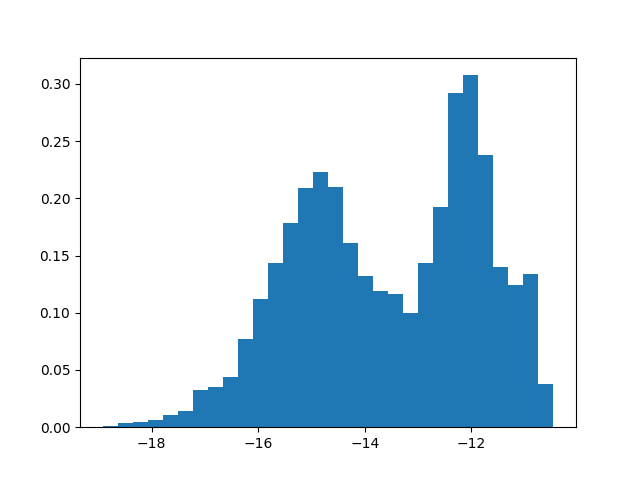

(array([0.00070882, 0.00354408, 0.0046073 , 0.00602494, 0.01063224,
        0.01453073, 0.03260554, 0.0354408 , 0.044301  , 0.07690654,
        0.11199293, 0.14388965, 0.17826722, 0.20874631, 0.22292263,
        0.20980953, 0.16090123, 0.13219418, 0.11908109, 0.11624582,
        0.09994306, 0.14318083, 0.19244354, 0.2923866 , 0.30762614,
        0.23816217, 0.14034557, 0.12439721, 0.13432063, 0.03792166]),
 array([-18.92072174, -18.63856106, -18.35640038, -18.07423971,
        -17.79207903, -17.50991836, -17.22775768, -16.945597  ,
        -16.66343633, -16.38127565, -16.09911497, -15.8169543 ,
        -15.53479362, -15.25263295, -14.97047227, -14.68831159,
        -14.40615092, -14.12399024, -13.84182956, -13.55966889,
        -13.27750821, -12.99534754, -12.71318686, -12.43102618,
        -12.14886551, -11.86670483, -11.58454415, -11.30238348,
        -11.0202228 , -10.73806213, -10.45590145]),
 <BarContainer object of 30 artists>)

In [25]:
plt.figure()
plt.hist(test_dist.peak_absmag_lssti, bins=30, density=True)

<IPython.core.display.Javascript object>


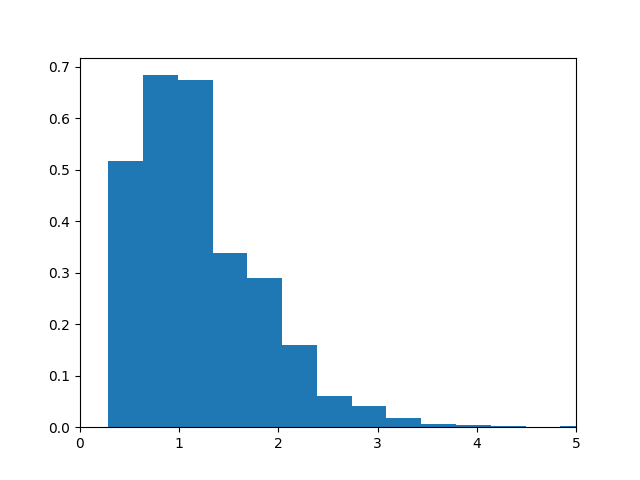

(0.0, 5.0)

In [23]:
plt.figure()
plt.hist(test_dist.one_mag_peak_time_lssti, bins=70, density=True)
plt.xlim(0,5)

<IPython.core.display.Javascript object>


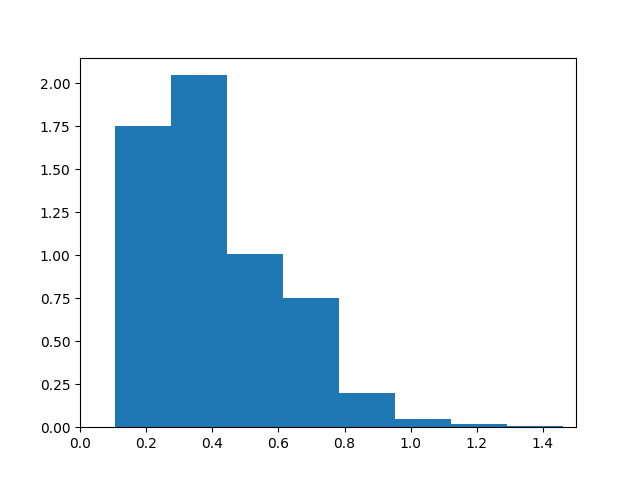

(0.0, 1.5)

In [24]:
plt.figure()
plt.hist(test_dist.peak_time, bins=50, density=True)
plt.xlim(0,1.5)